### Scripts for making manuscript figures

In [1]:
import os
import math
import numpy as np
import matplotlib as mpl
from scipy.io import netcdf as nc
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
#from collections import OrderedDict
from matplotlib import cm
import csv
import warnings
warnings.filterwarnings('ignore')

### Fates ensemble

Note that it is damage frac looping within recovery scalar, i.e. first ensemble has damage_frac = 0.01, recovery_scalar = 0.2, second has damage_frac = 0.03, recovery_scalar = 0.2 etc.

In [2]:
filename_in = 'damage_ensemble_bfd1fd3_8e823b7_2021-05-07.h0.ensemble.sofar.nc' # damage frac = 0.01 to 0.09
# recovery scalar = 0.2 to 1.0. bmort = 0.016

fin = nc.netcdf_file(filename_in)
en_time = fin.variables['time'][:] / 365.
dmdntime = len(en_time)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)
#cohort_size_bins = np.append(cohort_size_bins, 200)

N_BA_SCLS = fin.variables['BA_SCLS'][:]
N_NCOHORT = fin.variables['ED_NCOHORTS'][:]
N_NPP_SCPF = fin.variables['NPP_SCPF'][:]
N_BIOMASS = fin.variables['ED_biomass'][:]
N_AGB_SCLS = fin.variables['AGB_SCLS'][:]

nensemble = N_BA_SCLS.shape[0]

N_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:]
N_N_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:]
N_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:]
N_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:]
N_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:]

N_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:]
N_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:]

N_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:]
N_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:]
N_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:]
N_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:]

N_M1_SCLS = fin.variables['M1_SCLS'][:]
N_M2_SCLS = fin.variables['M2_SCLS'][:]
N_M3_SCLS = fin.variables['M3_SCLS'][:]
N_M4_SCLS = fin.variables['M4_SCLS'][:]
N_M6_SCLS = fin.variables['M6_SCLS'][:]
N_M11_SCLS = fin.variables['M11_SCLS'][:]

N_M3_CDSC = fin.variables['M3_CDSC'][:]
N_M11_CDSC = fin.variables['M11_CDSC'][:]
N_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:]
N_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC']

N_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:]
N_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:]
#N_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]


N_DAMAGE_RATE = fin.variables['DAMAGE_RATE_CDCD'][:,:,:,:]
N_N_DAMAGE_CFLUX = fin.variables['DAMAGE_CFLUX_CDCD'][:,:,:,:]
N_RECOVERY_RATE = fin.variables['RECOVERY_RATE_CDCD'][:,:,:,:]
N_RECOVERY_CFLUX = fin.variables['RECOVERY_CFLUX_CDCD'][:,:,:,:]

N_CAREA_D = fin.variables['CROWNAREA_CANOPY_DAMAGE'][:]
N_PFT_CROWNAREA = fin.variables['PFTcrownarea'][:]
N_CAREA_M = fin.variables['MORTALITY_CROWNAREA_CANOPY'][:]

N_LITTER_IN = fin.variables['LITTER_IN'][:]

damage_frac = np.linspace(0.01, 0.09, num=5)
damage_recovery_scalar = np.linspace(0.2, 1.0, num=5)
n_damage_frac = len(damage_frac)
n_damage_recovery_scalar = len(damage_recovery_scalar)

print(damage_frac)
print(damage_recovery_scalar)

fin.close()

[0.01 0.03 0.05 0.07 0.09]
[0.2 0.4 0.6 0.8 1. ]


In [3]:
# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

# colours for damage classes
viridis = cm.get_cmap('viridis', 10)
dm_colormap = viridis(range(10))

### Damage off

In [4]:
filename_in = 'damage_off.Cbfd1fd35-F8e823b76.2021-05-09.clm2.h0.fullrun.nc'


fin = nc.netcdf_file(filename_in)
d_time = fin.variables['time'][:] / 365.
dmdntime = len(d_time)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)
patch_age_bins = fin.variables['fates_levage'][:]
nagebins = len(patch_age_bins)

print(dmdntime)

BIOMASS = fin.variables['ED_biomass'][:,:]
AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
NPP = fin.variables['NPP'][:,:]
BIOMASS = fin.variables['ED_biomass'][:,:]
NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
GPP = fin.variables['GPP'][:,:]

NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

fin.close()

6000


### Damage (no mortality)

In [5]:
filename_in = 'damage_bfd1fd3_8e823b7_2021-05-11.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v1d_time = fin.variables['time'][:] / 365.
v1dmdntime = len(v1d_time)

v1_BIOMASS = fin.variables['ED_biomass'][:,:]
v1_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v1_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v1_NPP = fin.variables['NPP'][:,:]
v1_BIOMASS = fin.variables['ED_biomass'][:,:]
v1_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v1_GPP = fin.variables['GPP'][:,:]

v1_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v1_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v1_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v1_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v1_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

v1_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v1_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

v1_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
v1_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v1_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v1_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v1_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v1_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v1_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v1_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v1_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v1_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v1_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v1_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v1_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v1_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v1_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v1_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

v1_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v1_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v1_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

# DAMAGE
v1_DAMAGE_RATE = fin.variables['DAMAGE_RATE_CDCD'][:,:,:]
v1_DAMAGE_CFLUX = fin.variables['DAMAGE_CFLUX_CDCD'][:,:,:]
v1_RECOVERY_RATE = fin.variables['RECOVERY_RATE_CDCD'][:,:,:]
v1_RECOVERY_CFLUX = fin.variables['RECOVERY_CFLUX_CDCD'][:,:,:]

v1_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]


fin.close()

### Mortality (no damage)

In [6]:
filename_in = 'mortality.Cbfd1fd35-F8e823b76.2021-05-10.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v2d_time = fin.variables['time'][:] / 365.
v2dmdntime = len(v2d_time)

v2_BIOMASS = fin.variables['ED_biomass'][:,:]
v2_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v2_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v2_NPP = fin.variables['NPP'][:,:]
v2_BIOMASS = fin.variables['ED_biomass'][:,:]
v2_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v2_GPP = fin.variables['GPP'][:,:]

v2_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v2_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v2_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v2_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v2_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

v2_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v2_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

v2_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
v2_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v2_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v2_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v2_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v2_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v2_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v2_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v2_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v2_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v2_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v2_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v2_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v2_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v2_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v2_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

v2_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v2_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v2_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

# DAMAGE
v2_DAMAGE_RATE = fin.variables['DAMAGE_RATE_CDCD'][:,:,:]
v2_DAMAGE_CFLUX = fin.variables['DAMAGE_CFLUX_CDCD'][:,:,:]
v2_RECOVERY_RATE = fin.variables['RECOVERY_RATE_CDCD'][:,:,:]
v2_RECOVERY_CFLUX = fin.variables['RECOVERY_CFLUX_CDCD'][:,:,:]

v2_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]


#fin.close()

### Damage + mortality 

In [7]:
filename_in = 'damage_mortality.Cbfd1fd35-F8e823b76.2021-05-12.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v3d_time = fin.variables['time'][:] / 365.
v3dmdntime = len(v3d_time)

v3_BIOMASS = fin.variables['ED_biomass'][:,:]
v3_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v3_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v3_NPP = fin.variables['NPP'][:,:]
v3_BIOMASS = fin.variables['ED_biomass'][:,:]
v3_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v3_GPP = fin.variables['GPP'][:,:]

v3_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v3_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v3_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v3_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v3_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

v3_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v3_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

v3_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
v3_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v3_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v3_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v3_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v3_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v3_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v3_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v3_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v3_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v3_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v3_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v3_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v3_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v3_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v3_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

v3_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v3_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v3_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

# DAMAGE
v3_DAMAGE_RATE = fin.variables['DAMAGE_RATE_CDCD'][:,:,:]
v3_DAMAGE_CFLUX = fin.variables['DAMAGE_CFLUX_CDCD'][:,:,:]
v3_RECOVERY_RATE = fin.variables['RECOVERY_RATE_CDCD'][:,:,:]
v3_RECOVERY_CFLUX = fin.variables['RECOVERY_CFLUX_CDCD'][:,:,:]

v3_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]


fin.close()

### Figure 1 - M11 by damage class

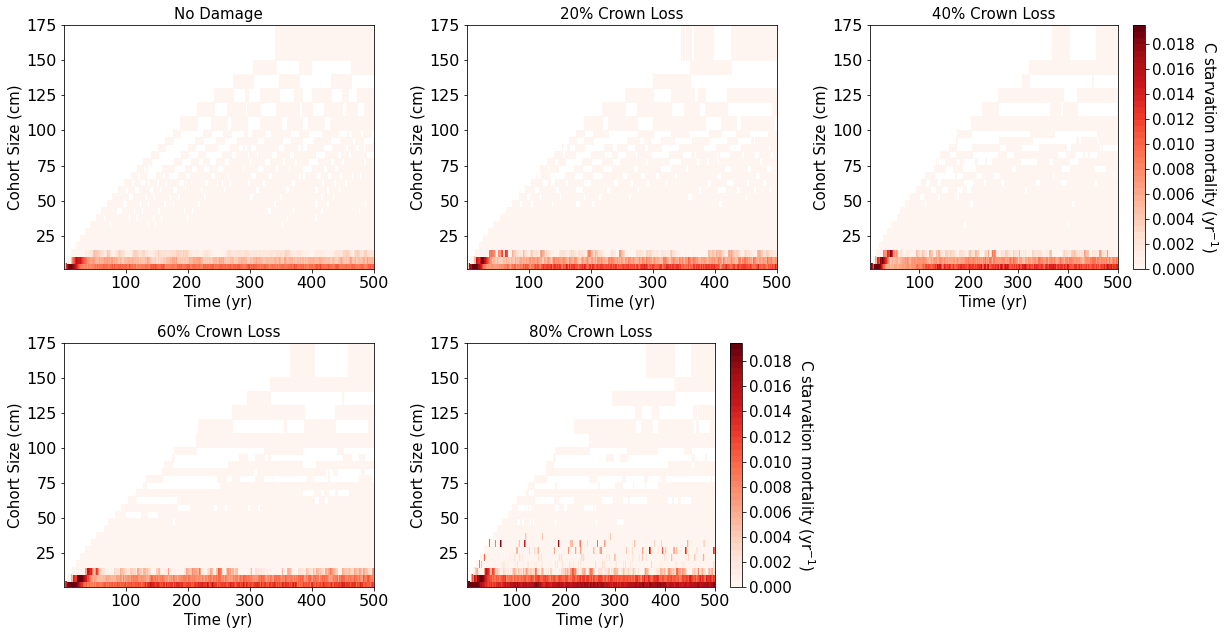

In [8]:
fig1, ((f1ax0, f1ax1, f1ax2), (f1ax3, f1ax4, f1ax5)) = plt.subplots(nrows=2,ncols=3, figsize=(20,10))

v1_m3 = np.delete(np.reshape(np.squeeze(v1_M3_CDSC), (dmdntime,  ndamagebins, nsizebins)), 0, 2)
npl = np.delete(np.reshape(np.squeeze(v1_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)

levels = np.arange(0.,0.02, 0.0005)
cmap = plt.get_cmap('Reds')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f1ax0.pcolormesh(d_time, cohort_size_bins[1:], (v1_m3[:,0,:] / npl[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax0.set_title(r'No Damage', fontsize=15)
f1ax0.set_xlabel('Time (yr)', fontsize=15)
f1ax0.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax0.tick_params(labelsize=16)

im = f1ax1.pcolormesh(d_time, cohort_size_bins[1:], (v1_m3[:,1,:] / npl[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f1ax1.set_title(r'20% Crown Loss', fontsize=15)
f1ax1.set_xlabel('Time (yr)', fontsize=15)
f1ax1.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax1.tick_params(labelsize=16)

im = f1ax2.pcolormesh(d_time, cohort_size_bins[1:], (v1_m3[:,2,:] / npl[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax2.set_title(r'40% Crown Loss', fontsize=15)
f1ax2.set_xlabel('Time (yr)', fontsize=15)
f1ax2.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax2.tick_params(labelsize=16)
cbar = fig1.colorbar(im, ax=f1ax2)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'C starvation mortality (yr$^{-1})$', rotation=270, fontsize=15)


im = f1ax3.pcolormesh(d_time, cohort_size_bins[1:], (v1_m3[:,3,:] / npl[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax3.set_title(r'60% Crown Loss', fontsize=15)
f1ax3.set_xlabel('Time (yr)', fontsize=15)
f1ax3.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax3.tick_params(labelsize=16)

im = f1ax4.pcolormesh(d_time, cohort_size_bins[1:], (v1_m3[:,4,:] / npl[:,4,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax4.set_title(r'80% Crown Loss', fontsize=15)
f1ax4.set_xlabel('Time (yr)', fontsize=15)
f1ax4.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax4.tick_params(labelsize=16)
cbar = fig1.colorbar(im, ax=f1ax4)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'C starvation mortality (yr$^{-1})$', rotation=270, fontsize=15)


f1ax5.axis('off') 

plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Figures/m3_by_damage.png", format = 'png', dpi = 300)
    

### C starvation mortality as a barplot

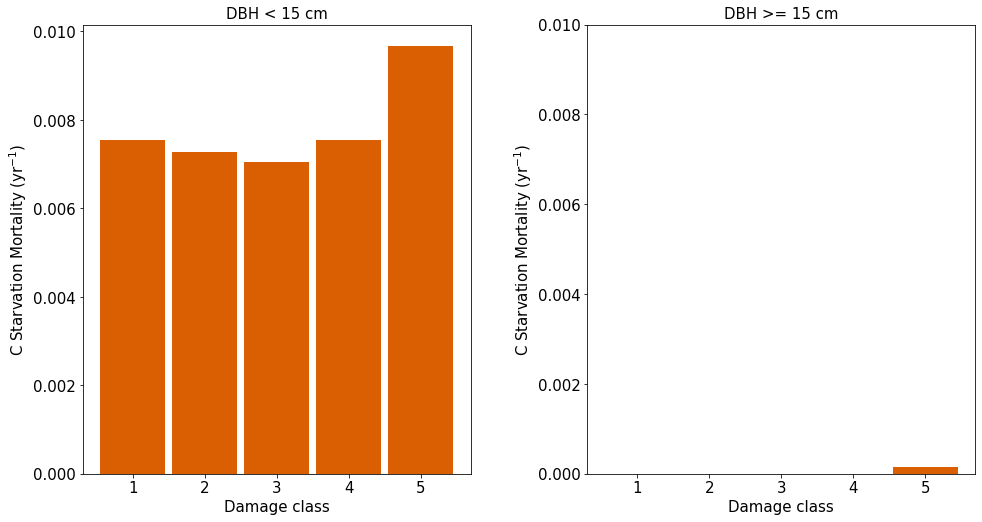

In [9]:
fig1b, ((f1bax0, f1bax1)) = plt.subplots(nrows=1,ncols=2, figsize=(16,8))

v1_m3 = np.delete(np.reshape(np.squeeze(v1_M3_CDSC), (dmdntime,  ndamagebins, nsizebins)), 0, 2)
npl = np.delete(np.reshape(np.squeeze(v1_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)

v1_m3_ave_s = np.sum(v1_m3[:,:,0:4], axis=2)/np.sum(npl[:,:,0:4], axis=2)
v1_m3_ave_s = np.mean(v1_m3_ave_s[4800:,:], axis=0)

v1_m3_ave_m = np.sum(v1_m3[:,:,3:], axis=2)/np.sum(npl[:,:,3:], axis=2)
v1_m3_ave_m = np.mean(v1_m3_ave_m[4800:,:], axis=0)


ind = np.arange((ndamagebins))
width = 0.9
  
f1bax0.bar(ind, v1_m3_ave_s, width, color=colormap[1])
f1bax0.set_ylabel(r'C Starvation Mortality (yr$^{-1}$)', fontsize=15)
f1bax0.set_xlabel('Damage class', fontsize=15)
f1bax0.set_title('DBH < 15 cm', fontsize=15)
f1bax0.set_xticks(ind)
f1bax0.tick_params(labelsize=15)
f1bax0.set_xticklabels(['1', '2', '3', '4', '5'])


f1bax1.bar(ind, v1_m3_ave_m, width, color=colormap[1])
f1bax1.set_ylim((0,0.01))
f1bax1.set_ylabel(r'C Starvation Mortality (yr$^{-1}$)', fontsize=15)
f1bax1.set_xlabel('Damage class', fontsize=15)
f1bax1.set_title('DBH >= 15 cm', fontsize=15)
f1bax1.set_xticks(ind)
f1bax1.tick_params(labelsize=15)
f1bax1.set_xticklabels(['1', '2', '3', '4', '5'])

plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Figures/m3_by_damage_barplot.png", format = 'png', dpi = 300)
    

### Stats on C starvation mortality

In [10]:
v1_m3 = np.delete(np.reshape(np.squeeze(v1_M3_CDSC), (dmdntime,  ndamagebins, nsizebins)), 0, 2)
npl = np.delete(np.reshape(np.squeeze(v1_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)

# mean over last 100 years 1-15 cm dbh bin 
m = np.sum(v1_m3[:,:,0:4], axis=2)
n = np.sum(npl[:,:,0:4], axis=2)
o = m/n
p = np.mean(o[4800:,:],axis=0)
print('Mean 1-15 cm dbh')
print(p)
print('as a percent of no damage')
q = p/p[0]
print(q)

# mean over last 100 years 15-50 cm dbh bin 
m = np.sum(v1_m3[:,:,3:11], axis=2)
n = np.sum(npl[:,:,3:11], axis=2)
o = m/n
p = np.mean(o[4800:,:],axis=0)
print('Mean 15-50 cm dbh')
print(p)
print('as a percent of no damage')
q = p/p[0]
print(q)

# mean over last 100 years >= 50 cm dbh bin 
m = np.sum(v1_m3[:,:,10:], axis=2)
n = np.sum(npl[:,:,10:], axis=2)
o = m/n
p = np.mean(o[4800:,:],axis=0)
print('Mean >= 50 cm dbh')
print(p)
print('as a percent of no damage')
q = p/p[0]
print(q)



Mean 1-15 cm dbh
[0.00754131 0.0072718  0.00705642 0.00754192 0.0096716 ]
as a percent of no damage
[1.         0.9642617  0.93570197 1.0000805  1.2824831 ]
Mean 15-50 cm dbh
[0.         0.         0.         0.         0.00021436]
as a percent of no damage
[nan nan nan nan inf]
Mean >= 50 cm dbh
[0. 0. 0. 0. 0.]
as a percent of no damage
[nan nan nan nan nan]


### Fig. 2 Ensemble 

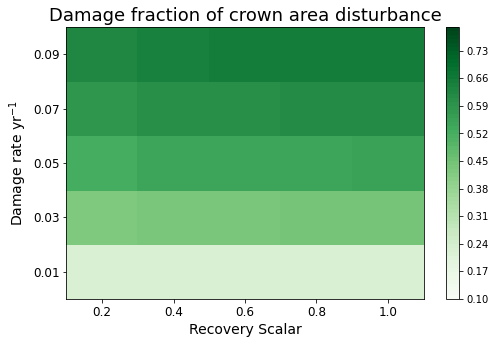

In [11]:
fig2, ((f2ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(8,5))

test = np.linspace(1,6,6)

damage_carea_frac = np.zeros((nensemble))

for j in range(0,nensemble):
    carea_m = N_CAREA_M[j,:,:]
    carea_m = np.reshape(carea_m, (500, 12))
    carea_m_yr = np.mean(carea_m, axis = 1)
    carea_d = N_CAREA_D[j,:,:]    
    carea_d = np.reshape(carea_d, (500, 12))
    carea_d_yr = np.mean(carea_d, axis = 1)
    damage_carea_frac_yr = carea_d_yr/(carea_d_yr + carea_m_yr)
    damage_carea_frac[j] = np.mean(damage_carea_frac_yr[400:], axis=0)
    #print(damage_carea_frac[j])
    
    
damage_carea_frac = np.reshape(damage_carea_frac, (n_damage_frac, n_damage_recovery_scalar))
#print(damage_carea_frac)

levels = np.arange(0.1, 0.8, 0.01)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f2ax0.pcolormesh(test, test, damage_carea_frac[:,:].transpose(), 
                      cmap=cmap, norm=norm)
fig2.colorbar(im, ax=f2ax0)    
f2ax0.set_title(r'Damage fraction of crown area disturbance', fontsize = 18)
f2ax0.set_xlabel('Recovery Scalar', fontsize = 14)
f2ax0.set_ylabel(r'Damage rate yr$^{-1}$', fontsize = 14)
f2ax0.tick_params(labelsize=12)
f2ax0.set_xticks(test[0:5]+0.5)
labs = np.round(damage_recovery_scalar,3)
f2ax0.set_xticklabels(labs)
f2ax0.set_yticks(test[0:5]+0.5)
labs = np.round(damage_frac,3)
f2ax0.set_yticklabels(labs)

plt.savefig("Figures/Damage_frac_recovery_scalar_heatmatp.png", format = 'png', dpi = 300)
    

### Figure 3 - AGB and carbon residence time

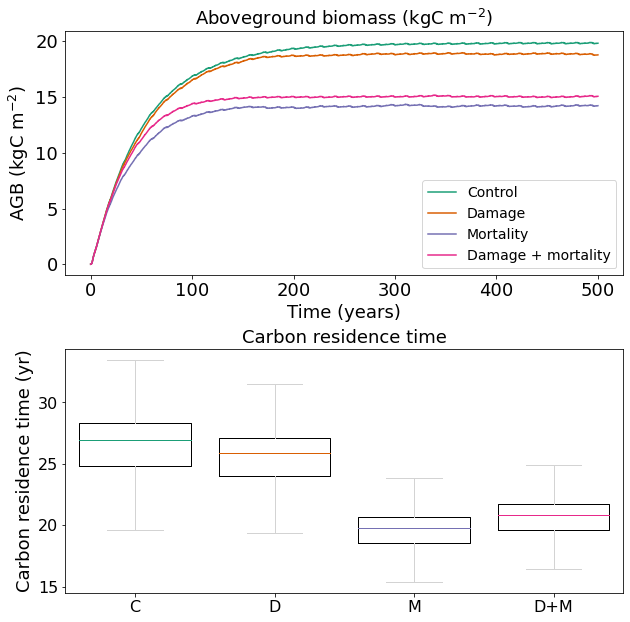

In [12]:
fig3, ((f3ax0, f3ax1)) = plt.subplots(nrows=2,ncols=1, figsize=(10,10))

### AGB
f3ax0.plot(d_time, np.sum(AGB_SCLS, axis=1), label = 'Control', 
          color=colormap[0])
f3ax0.plot(d_time, np.sum(v1_AGB_SCLS, axis = 1), label = 'Damage', color=colormap[1])
f3ax0.plot(d_time, np.sum(v2_AGB_SCLS, axis = 1), label = 'Mortality', color=colormap[2])
f3ax0.plot(d_time, np.sum(v3_AGB_SCLS, axis = 1), label = 'Damage + mortality', color=colormap[3])


f3ax0.set_title(r'Aboveground biomass (kgC m$^{-2}$)', fontsize = 18)
f3ax0.set_ylabel('AGB (kgC m$^{-2}$)', fontsize = 18)
f3ax0.set_xlabel('Time (years)', fontsize=18)
f3ax0.tick_params(labelsize=18)
f3ax0.legend(prop={'size':14})

v2_cveg = np.squeeze(v2_BIOMASS)/1000
v2_npp = np.sum(np.squeeze(v2_NPP_SCPF), axis=1)
v2_cres = v2_cveg/v2_npp

v1_cveg = np.squeeze(v1_BIOMASS)/1000
v1_npp = np.sum(np.squeeze(NPP_SCPF), axis=1)
v1_cres = v1_cveg/v1_npp

v3_cveg = np.squeeze(v3_BIOMASS)/1000
v3_npp = np.sum(np.squeeze(NPP_SCPF), axis=1)
v3_cres = v3_cveg/v3_npp

cveg = np.squeeze(BIOMASS)/1000
npp = np.sum(np.squeeze(NPP_SCPF), axis=1)
cres = cveg/npp

data = [cres,v1_cres, v2_cres,v3_cres]
flierprops = dict(markerfacecolor='lightgrey', markersize=3,
                  linestyle='none', markeredgecolor='lightgrey')

f3ax1.boxplot(cres, positions=[1], flierprops=flierprops, 
             medianprops=dict(color=colormap[0]),
             capprops=dict(color='lightgrey'),
            whiskerprops=dict(color='lightgrey'), widths=0.8, 
              showfliers=False)
f3ax1.boxplot(v1_cres, positions=[2], flierprops=flierprops, 
             medianprops=dict(color=colormap[1]),
             capprops=dict(color='lightgrey'),
            whiskerprops=dict(color='lightgrey'), widths=0.8, 
              showfliers=False)
f3ax1.boxplot(v2_cres, positions=[3], flierprops=flierprops, 
             medianprops=dict(color=colormap[2]),
             capprops=dict(color='lightgrey'),
            whiskerprops=dict(color='lightgrey'), widths=0.8,
              showfliers=False)
f3ax1.boxplot(v3_cres, positions=[4], flierprops=flierprops, 
             medianprops=dict(color=colormap[3]),
             capprops=dict(color='lightgrey'),
            whiskerprops=dict(color='lightgrey'), widths=0.8, 
              showfliers=False)

    
#ind = np.linspace(1,5,1)

#width = 0.5
  
#f3ax1.bar(1, np.mean(cres[4800:],axis=0), width, color=colormap[0])
#f3ax1.bar(2, np.mean(v1_cres[4800:],axis=0), width, color=colormap[1])
#f3ax1.bar(3, np.mean(v2_cres[4800:],axis=0), width, color=colormap[2])
#f3ax1.bar(4, np.mean(v3_cres[4800:],axis=0), width, color=colormap[3])
#f3ax1.set_xticks((1,2,3,4))

f3ax1.set_ylabel(r'Carbon residence time (yr)', fontsize=18)
f3ax1.set_title('Carbon residence time', fontsize=18)
f3ax1.tick_params(labelsize=16)
f3ax1.set_xticklabels(['C', 'D', 'M', 'D+M'])



plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)


plt.savefig("Figures/AGB_cres.png", format = 'png', dpi = 300)
    

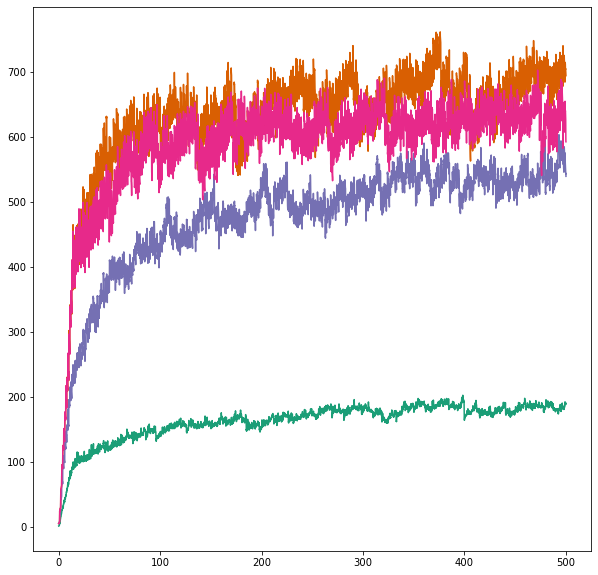

In [13]:
fig3, ((f3ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(10,10))

### AGB
f3ax0.plot(d_time, NCOHORT, label = 'Control', 
          color=colormap[0])
f3ax0.plot(d_time, v1_NCOHORT, label = 'Damage', color=colormap[1])
f3ax0.plot(d_time, v2_NCOHORT, label = 'Mortality', color=colormap[2])
f3ax0.plot(d_time, v3_NCOHORT, label = 'Damage + mortality', color=colormap[3])



### Some numbers on AGB and C residence

In [14]:
control = np.sum(AGB_SCLS, axis=1)
control = np.mean(control[4800:,:], axis =0)
print('control', control)

damage = np.sum(v1_AGB_SCLS, axis=1)
damage = np.mean(damage[4800:,:], axis =0)
print('damage only', damage)

mort = np.sum(v2_AGB_SCLS, axis=1)
mort = np.mean(mort[4800:,:], axis =0)
print('mortality only', mort)

damage_mort = np.sum(v3_AGB_SCLS, axis=1)
damage_mort = np.mean(damage_mort[4800:,:], axis =0)
print('damage + mortality', damage_mort)

print('control - mort', control - mort)
print('control - damage_mort', control - damage_mort)
print('conrol - damage', control - damage)
print('d+m % loss', 100- (damage_mort/control*100))

cres = np.mean(cres[4800:], axis=0)
print('control', cres)

v1cres = np.mean(v1_cres[4800:], axis=0)
print('damage', v1cres)

v2cres = np.mean(v2_cres[4800:], axis=0)
print('mortality', v2cres)

v3cres = np.mean(v3_cres[4800:], axis=0)
print('damage_mort', v3cres)

print('d+m % loss', 100- (v3cres/cres*100))


print('control - mort', cres - v2cres)
print('control - damage_mort', cres - v3cres)
print('conrol - damage', cres - v1cres)

control [19.818777]
damage only [18.857416]
mortality only [14.191958]
damage + mortality [15.026048]
control - mort [5.6268187]
control - damage_mort [4.7927294]
conrol - damage [0.96136093]
d+m % loss [24.18277]
control 29.412773
damage 27.985964
mortality 21.293484
damage_mort 22.299597
d+m % loss 24.18397068977356
control - mort 8.119289
control - damage_mort 7.1131763
conrol - damage 1.4268093


In [15]:
z = ZSTAR_BY_AGE
z1 = v1_ZSTAR_BY_AGE
z2 = v2_ZSTAR_BY_AGE
z3 = v3_ZSTAR_BY_AGE

data = [np.squeeze(z[4800:,6,:]), np.squeeze(z1[4800:,6,:]), np.squeeze(z2[4800:,6,:]), np.squeeze(z3[4800:,6,:])]

print(data[1])

[14.453569 14.469414 14.457348 ... 15.92985  15.925644 15.921968]


(6000, 7, 1)
C [16.31984]
D [14.124219]
M [12.023638]
DM [12.922259]


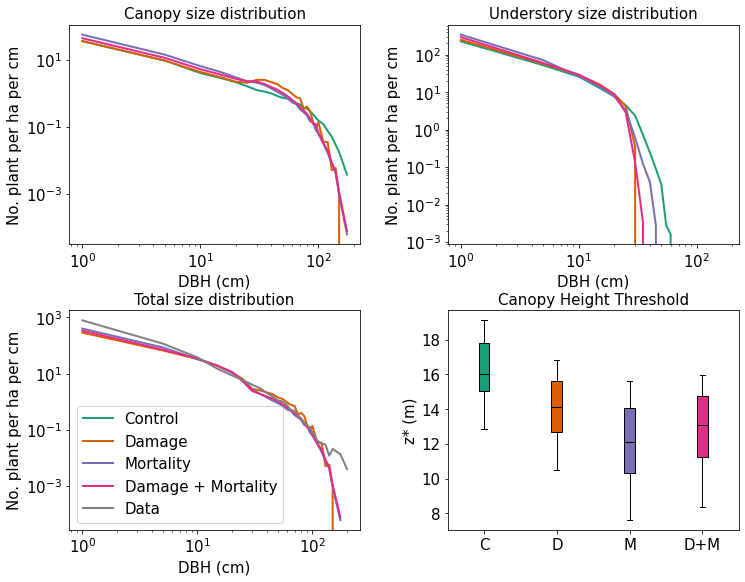

In [16]:
fig5, ((f5ax0, f5ax1), (f5ax2, f5ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(12,9))

cohort_size_bins_ex = np.append(cohort_size_bins,200)
bins = np.diff(cohort_size_bins_ex)

a = np.squeeze(v1_NPLANT_CANOPY_SCLS[:,1:,:])
a = np.mean(a[4800:,:],axis=0)  
a = a/bins[1:]

b = np.squeeze(v2_NPLANT_CANOPY_SCLS[:,1:,:])
b = np.mean(b[4800:,:],axis=0)  
b = b/bins[1:]

c = np.squeeze(v3_NPLANT_CANOPY_SCLS[:,1:,:])
c = np.mean(c[4800:,:],axis=0)  
c = c/bins[1:]
       
# and the control    
CONTROL = np.squeeze(NPLANT_CANOPY_SCLS[:,1:,:])
CONTROL = np.mean(CONTROL[4800:,:],axis=0) 
CONTROL = CONTROL/bins[1:]

f5ax0.plot(cohort_size_bins_ex[1:-1], CONTROL, label = 'Control', linewidth = 2, 
            color = colormap[0])
f5ax0.plot(cohort_size_bins_ex[1:-1], a, label = 'Damage', linewidth = 2, color=colormap[1])
f5ax0.plot(cohort_size_bins_ex[1:-1], b, label = 'Mortality', linewidth = 2, color=colormap[2])
f5ax0.plot(cohort_size_bins_ex[1:-1], c, label = 'Damage + Mortality', linewidth = 2, color=colormap[3])

f5ax0.set_title(r'Canopy size distribution', fontsize = 15)
f5ax0.set_xlabel('DBH (cm)', fontsize = 15)
f5ax0.set_ylabel('No. plant per ha per cm', fontsize = 15)
f5ax0.tick_params(labelsize=15)
f5ax0.set_yscale('log')
f5ax0.set_xscale('log')


a = np.squeeze(v1_NPLANT_UNDERSTORY_SCLS[:,1:,:])
a = np.mean(a[4800:,:],axis=0)  
a = a/bins[1:]

b = np.squeeze(v2_NPLANT_UNDERSTORY_SCLS[:,1:,:])
b = np.mean(b[4800:,:],axis=0)  
b = b/bins[1:]

c = np.squeeze(v3_NPLANT_UNDERSTORY_SCLS[:,1:,:])
c = np.mean(c[4800:,:],axis=0)  
c = c/bins[1:]
              
# and the control    
CONTROL = np.squeeze(NPLANT_UNDERSTORY_SCLS[:,1:,:])
CONTROL = np.mean(CONTROL[4800:,:],axis=0) 
CONTROL = CONTROL/bins[1:]


f5ax1.plot(cohort_size_bins_ex[1:-1], CONTROL, label = 'Control', linewidth = 2, 
              color = colormap[0])
f5ax1.plot(cohort_size_bins_ex[1:-1], a, label = 'Damage', linewidth = 2, color=colormap[1])
f5ax1.plot(cohort_size_bins_ex[1:-1], b, label = 'Mortality', linewidth = 2, color=colormap[2])
f5ax1.plot(cohort_size_bins_ex[1:-1], c, label = 'Damage + Mortality', linewidth = 2, color=colormap[3])

f5ax1.set_title(r'Understory size distribution', fontsize = 15)
f5ax1.set_xlabel('DBH (cm)', fontsize = 15)
f5ax1.set_ylabel('No. plant per ha per cm', fontsize = 15)
f5ax1.tick_params(labelsize=15)
f5ax1.set_yscale('log')
f5ax1.set_xscale('log')

with open("size_dist.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    next(reader, None)  # skip the headers
    data_read = [row for row in reader]

data_read = [float(x[1]) for x in data_read]

a = np.squeeze(v2_NPLANT_SCLS[:,1:,:])
a = np.mean(a[4800:,:],axis=0)  
a = a/bins[1:]

b = np.squeeze(v1_NPLANT_SCLS[:,1:,:])
b = np.mean(b[4800:,:],axis=0)  
b = b/bins[1:]

c = np.squeeze(v3_NPLANT_SCLS[:,1:,:])
c = np.mean(c[4800:,:],axis=0)  
c = c/bins[1:]
   
# and the control    
CONTROL = np.squeeze(NPLANT_SCLS[:,1:,:])
CONTROL = np.mean(CONTROL[48000:,:],axis=0) 
CONTROL = CONTROL/bins[1:]


f5ax2.plot(cohort_size_bins_ex[1:-1], CONTROL, label = 'Control', linewidth = 2, 
            color = colormap[0])
f5ax2.plot(cohort_size_bins_ex[1:-1], b, label = 'Damage', linewidth = 2, color=colormap[1])
f5ax2.plot(cohort_size_bins_ex[1:-1], a, label = 'Mortality', linewidth = 2, color=colormap[2])
f5ax2.plot(cohort_size_bins_ex[1:-1], c, label = 'Damage + Mortality', linewidth = 2, color=colormap[3])

f5ax2.plot(cohort_size_bins_ex[1:], data_read, label = 'Data', linewidth = 2, color = 'grey')    

f5ax2.set_title(r'Total size distribution', fontsize = 15)
f5ax2.set_xlabel('DBH (cm)', fontsize = 15)
f5ax2.set_ylabel('No. plant per ha per cm', fontsize = 15)
f5ax2.tick_params(labelsize=15)
f5ax2.set_yscale('log')
f5ax2.set_xscale('log')
f5ax2.legend(prop={'size': 15})


z = ZSTAR_BY_AGE
z1 = v1_ZSTAR_BY_AGE
z2 = v2_ZSTAR_BY_AGE
z3 = v3_ZSTAR_BY_AGE

print(ZSTAR_BY_AGE.shape)

print('C', np.mean(z[4800:,6,:],axis=0))
print('D', np.mean(z1[4800:,6,:],axis=0))
print('M', np.mean(z2[4800:,6,:],axis=0))
print('DM', np.mean(z3[4800:,6,:],axis=0))

data = np.vstack((np.squeeze(z[4800:,6,:]), np.squeeze(z1[4800:,6,:]), np.squeeze(z2[4800:,6,:]), np.squeeze(z3[4800:,6,:])))

box1 = f5ax3.boxplot(data[0,:], positions=[1], patch_artist=True,
            boxprops=dict(facecolor=colormap[0]), 
            medianprops=dict(color='black'))
box1 = f5ax3.boxplot(data[1,:], positions=[2], patch_artist=True,
            boxprops=dict(facecolor=colormap[1]), 
            medianprops=dict(color='black'))
box1 = f5ax3.boxplot(data[2,:], positions=[3], patch_artist=True,
            boxprops=dict(facecolor=colormap[2]), 
            medianprops=dict(color='black'))
box1 = f5ax3.boxplot(data[3,:], positions=[4], patch_artist=True,
            boxprops=dict(facecolor=colormap[3]), 
            medianprops=dict(color='black'))



f5ax3.set_ylabel(r'z* (m)', fontsize=15)
f5ax3.set_title('Canopy Height Threshold', fontsize=15)
f5ax3.tick_params(labelsize=15)
f5ax3.set_xticklabels(['C', 'D', 'M', 'D+M'])



plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

  
plt.savefig("Figures/size_dists_canopy_understory.png", format = 'png', dpi = 300)


[[0.01409464 0.07672889 0.07037905 0.30225973 0.32475192]
 [0.0161516  0.08196627 0.10447608 0.3187013  0.29852698]
 [0.0273659  0.07854304 0.15118313 0.37142777 0.3645145 ]]


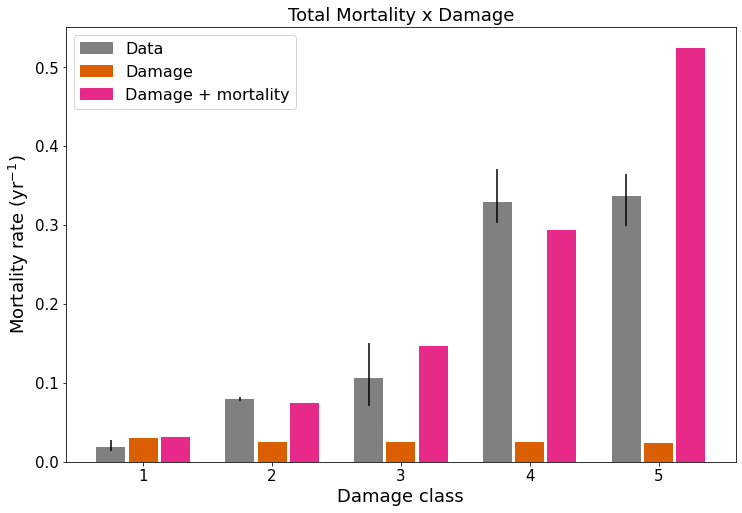

In [17]:
# total mortality by damage class 
# NB this does not include stems < 1 cm 

v1npl = np.delete(np.reshape(np.squeeze(v1_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2) 
v1tot_mort = np.delete(np.reshape(np.squeeze(v1_MORTALITY_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v1tot_prop = np.sum(v1tot_mort[4800:,:,:],axis=(0,2))/np.sum(v1npl[4800:,:,:],axis=(0,2))

v3npl = np.delete(np.reshape(np.squeeze(v3_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)  
v3tot_mort = np.delete(np.reshape(np.squeeze(v3_MORTALITY_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v3tot_prop = np.sum(v3tot_mort[4800:,:,:],axis=(0,2))/np.sum(v3npl[4800:,:,:],axis=(0,2))



### BCI - mortality by damage class    
with open("r_mort_by_damage.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    next(reader, None)  # skip the headers
    data_read = [row for row in reader]

data_read = [float(x[1]) for x in data_read]
data_read = np.array(data_read)


### open error bars
res = np.loadtxt(open('r_mort_by_damage_by_cens.csv', 'rb'), delimiter=',', skiprows=1)
res = np.delete(res, 0, 1)
print(res)

mini = data_read - np.min(res, axis=0)
maxi = np.max(res, axis=0) - data_read
yer = np.hstack((mini, maxi))
yer = np.reshape(yer, (2, 5))

ind = np.arange((ndamagebins*3)+4)
ind = np.delete(ind, (3, 7, 11, 15))

width = 0.9
  
fig6, ((f6ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(12,8))

f6ax0.bar(ind[::3], data_read, width, color='grey', yerr = yer)
f6ax0.bar(ind[::3]+1, v1tot_prop, width, color=colormap[1])
#f6ax0.bar(ind[::3]+2, v2tot_prop, width, color=colormap[2])
f6ax0.bar(ind[::3]+2, v3tot_prop, width, color=colormap[3])

f6ax0.set_ylabel(r'Mortality rate (yr$^{-1}$)', fontsize=18)
f6ax0.set_xlabel('Damage class', fontsize=18)
f6ax0.set_title('Total Mortality x Damage', fontsize=18)
f6ax0.set_xticks(ind[::3]+1)
f6ax0.tick_params(labelsize=15)
f6ax0.set_xticklabels(['1', '2', '3', '4', '5'])


colors = {'Data':'grey','Damage':colormap[1], 'Damage + mortality':colormap[3]}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ledg = plt.legend(handles, labels, loc='upper left', prop={'size':16})

plt.savefig("Figures/mort_v_bci.png", format = 'png', dpi = 300)



### Stats on mortality

In [18]:
# mean data minus damage plus mortality in 4
data_read - v3tot_prop

array([-0.01203626,  0.00417686, -0.0404348 ,  0.03535102, -0.18828147])

### Carbon residence time as a function of damage and recovery

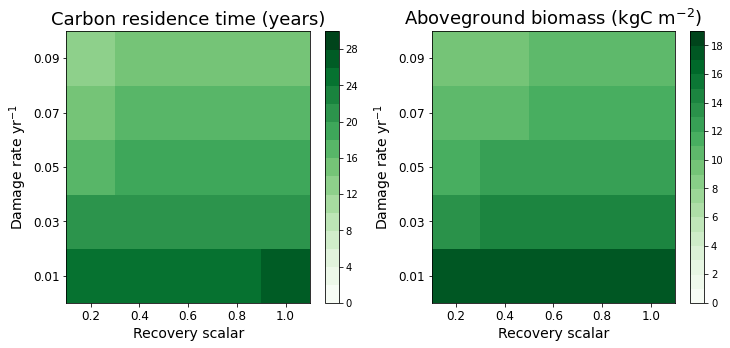

In [19]:
fig7, ((f7ax0, f7ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(12,5))

test = np.linspace(1,6,6)

cres_ensemble = np.zeros((nensemble))
agb_ensemble = np.zeros((nensemble))

for j in range(0,nensemble):
    cveg = np.squeeze(N_BIOMASS[j,:])/1000
    npp = np.sum(np.squeeze(N_NPP_SCPF[j,:,:,:]), axis=1)
    cres = cveg/npp
    cres_ensemble[j] = np.mean(cres[4800:], axis=0)
    #print(cres_ensemble[j])
    agb = np.sum(N_AGB_SCLS[j,:,:,:], axis=1)
    agb_ensemble[j] = np.mean(agb[4800:], axis=0)
    
cres_ensemble = np.reshape(cres_ensemble, (n_damage_frac, n_damage_recovery_scalar))
agb_ensemble = np.reshape(agb_ensemble, (n_damage_frac, n_damage_recovery_scalar))

#levels = np.arange(np.min(cres_ensemble)*0.9, np.max(cres_ensemble)*1.1, 0.1)
levels = np.arange(0, 32, 2)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f7ax0.pcolormesh(test, test, cres_ensemble[:,:].transpose(), 
                      cmap=cmap, norm=norm)
fig7.colorbar(im, ax=f7ax0)    
f7ax0.set_title(r'Carbon residence time (years)', fontsize = 18)
f7ax0.set_xlabel('Recovery scalar', fontsize = 14)
f7ax0.set_ylabel(r'Damage rate yr$^{-1}$', fontsize = 14)
f7ax0.tick_params(labelsize=12)
f7ax0.set_xticks(test[0:5]+0.5)
labs = np.round(damage_recovery_scalar,3)
f7ax0.set_xticklabels(labs)
f7ax0.set_yticks(test[0:5]+0.5)
labs = np.round(damage_frac,3)
f7ax0.set_yticklabels(labs)

#levels = np.arange(np.min(agb_ensemble)*0.9, np.max(agb_ensemble)*1.1, 0.1)
levels = np.arange(0, 20, 1)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f7ax1.pcolormesh(test, test, agb_ensemble[:,:].transpose(), 
                      cmap=cmap, norm=norm)
fig7.colorbar(im, ax=f7ax1)    
f7ax1.set_title(r'Aboveground biomass (kgC m$^{-2}$)', fontsize = 18)
f7ax1.set_xlabel('Recovery scalar', fontsize = 14)
f7ax1.set_ylabel(r'Damage rate yr$^{-1}$', fontsize = 14)
f7ax1.tick_params(labelsize=12)
f7ax1.set_xticks(test[0:5]+0.5)
labs = np.round(damage_recovery_scalar,3)
f7ax1.set_xticklabels(labs)
f7ax1.set_yticks(test[0:5]+0.5)
labs = np.round(damage_frac,3)
f7ax1.set_yticklabels(labs)


plt.savefig("Figures/CRES_Damage_frac_recovery_scalar_heatmatp.png", format = 'png', dpi = 300)
    

### some numbers on c residence and agb from the ensemble

In [20]:
print(cres_ensemble)

cveg = np.squeeze(BIOMASS)/1000
npp = np.sum(np.squeeze(NPP_SCPF), axis=1)
cres = cveg/npp
cres = np.mean(cres[4800:],axis=0)

print('control', cres)
print('control - ensemble', cres - np.min(cres_ensemble))

[[25.54285431 20.78301811 17.77228546 15.68654251 13.91027641]
 [25.70597076 21.38455772 18.57862091 16.45605659 14.60304832]
 [25.93702507 21.53165054 18.70998955 16.77937508 15.27062988]
 [25.91381454 21.70613861 18.95406342 16.82779884 15.12216473]
 [26.00619507 21.99800682 19.23369217 17.06941795 15.53724766]]
control 29.412773
control - ensemble 15.502496719360352


In [21]:
print(agb_ensemble)

control = np.sum(AGB_SCLS, axis=1)
control = np.mean(control[4800:,:], axis =0)
print('control', control)

print('control - agb ', control - np.min(agb_ensemble))

[[17.15932274 13.88079453 11.81069374 10.38196468  9.15745449]
 [17.28289413 14.29617882 12.38700962 10.92240429  9.6444149 ]
 [17.44416046 14.39998055 12.47095394 11.15182209 10.12492657]
 [17.42051697 14.53571796 12.64955521 11.18783855 10.01855755]
 [17.47685623 14.72614288 12.82737637 11.35234165 10.30316448]]
control [19.818777]
control - agb  [10.661323]


### Growth rates by damage class

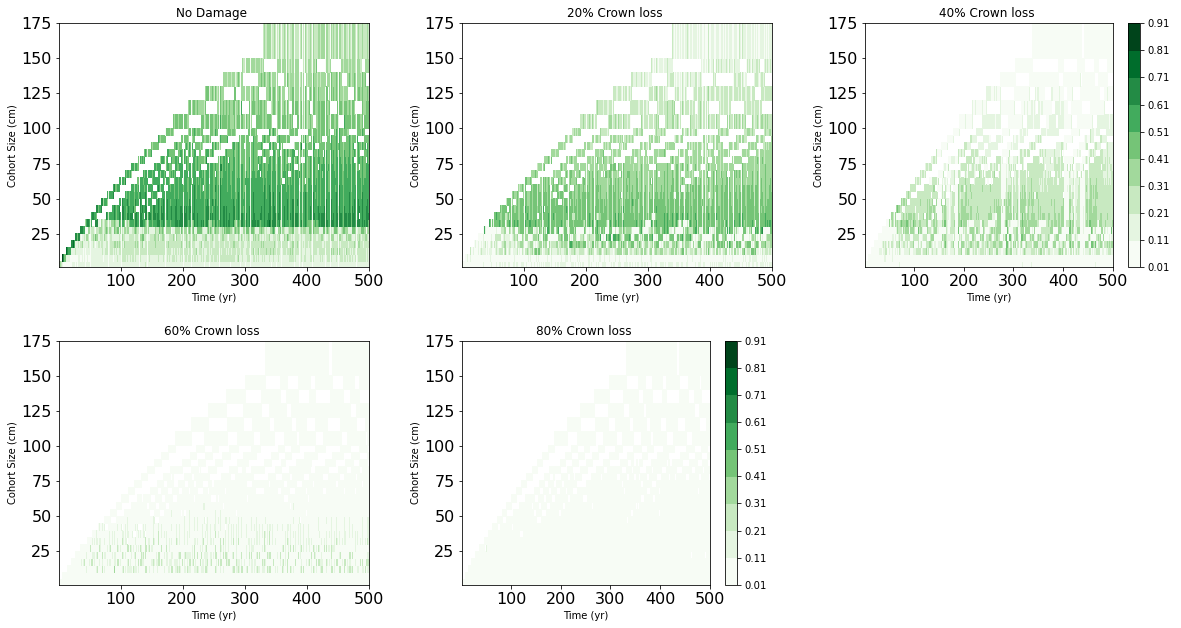

In [22]:
fig7, ((f7ax0, f7ax1,f7ax2), (f7ax3, f7ax4, f7ax5)) = plt.subplots(nrows=2,ncols=3, figsize=(20,10))

v3ddbh = np.delete(np.reshape(np.squeeze(v3_DDBH_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v3npl = np.delete(np.reshape(np.squeeze(v3_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)

levels = np.arange(0.01,1,0.1) 
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f7ax0.pcolormesh(d_time, cohort_size_bins[1:], (v3ddbh[:,0,:]/v3npl[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax0.set_title(r'No Damage ')
f7ax0.set_xlabel('Time (yr)')
f7ax0.set_ylabel('Cohort Size (cm)')
f7ax0.tick_params(labelsize=16)

im = f7ax1.pcolormesh(d_time, cohort_size_bins[1:], (v3ddbh[:,1,:]/v3npl[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f7ax1.set_title(r'20% Crown loss ')
f7ax1.set_xlabel('Time (yr)')
f7ax1.set_ylabel('Cohort Size (cm)')
f7ax1.tick_params(labelsize=16)


im = f7ax2.pcolormesh(d_time, cohort_size_bins[1:], (v3ddbh[:,2,:]/v3npl[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
fig7.colorbar(im, ax=f7ax2)
f7ax2.set_title(r'40% Crown loss ')
f7ax2.set_xlabel('Time (yr)')
f7ax2.set_ylabel('Cohort Size (cm)')
f7ax2.tick_params(labelsize=16)

im = f7ax3.pcolormesh(d_time, cohort_size_bins[1:], (v3ddbh[:,3,:]/v3npl[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax3.set_title(r'60% Crown loss ')
f7ax3.set_xlabel('Time (yr)')
f7ax3.set_ylabel('Cohort Size (cm)')
f7ax3.tick_params(labelsize=16)


im = f7ax4.pcolormesh(d_time, cohort_size_bins[1:], (v3ddbh[:,4,:]/v3npl[:,4,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax4.set_title(r'80% Crown loss ')
f7ax4.set_xlabel('Time (yr)')
f7ax4.set_ylabel('Cohort Size (cm)')
f7ax4.tick_params(labelsize=16)
fig7.colorbar(im, ax=f7ax4)

f7ax5.axis('off')


plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Figures/growth_by_damage.png", format = 'png', dpi = 300)
    

In [23]:
filename_in = 'high_damage_mortality_no_recovery_bfd1fd3_8e823b7_2021-05-18.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
high_cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
high_nsizebins = len(high_cohort_size_bins)
high_time = fin.variables['time'][:] / 365.
highdmdntime = len(high_time)

no_r_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
no_r_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

ddbh = np.delete(np.reshape(np.squeeze(no_r_DDBH_CDSC[0:6000,:,:]), (dmdntime, ndamagebins, high_nsizebins)), 0, 2)
npl = np.delete(np.reshape(np.squeeze(no_r_NPLANT_CDSC[0:6000,:,:]), (dmdntime, ndamagebins, high_nsizebins)), 0, 2)
no_r_d_gr = np.mean(ddbh, axis=(0,2))/np.mean(npl, axis=(0,2))


fin.close()

In [24]:
filename_in = 'high_damage_mortality_recovery_bfd1fd3_8e823b7_2021-05-18.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
high_cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
high_nsizebins = len(high_cohort_size_bins)

r_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
r_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

ddbh = np.delete(np.reshape(np.squeeze(r_DDBH_CDSC[0:6000,:,:]), (dmdntime, ndamagebins, high_nsizebins)), 0, 2)
npl = np.delete(np.reshape(np.squeeze(r_NPLANT_CDSC[0:6000,:,:]), (dmdntime, ndamagebins, high_nsizebins)), 0, 2)
r_d_gr = np.mean(ddbh, axis=(0,2))/np.mean(npl, axis=(0,2))


fin.close()

C [0.6648516] D [0.61856383] M [0.6708181] DM [0.6610533]
C [0.0057275] D [0.00601537] M [0.00914238] DM [0.00710375]
[1.8236217e-01 1.8281776e-01 9.3866691e-02 2.4344053e-02 2.4805604e-05]


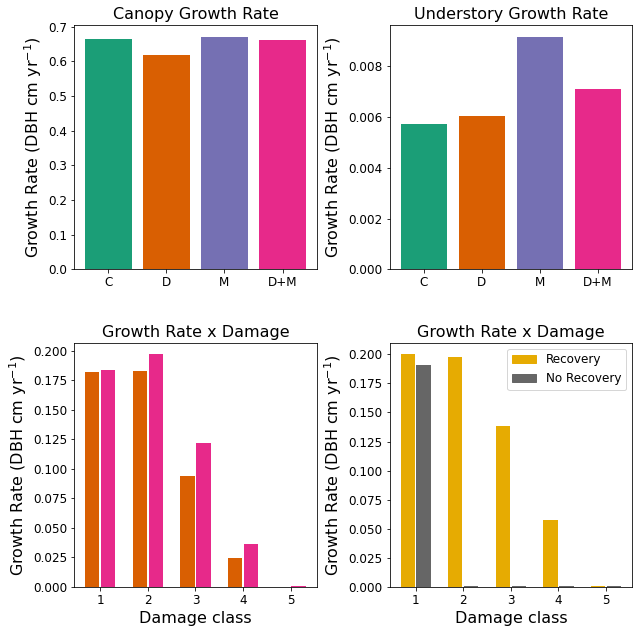

In [25]:
fig8, ((f8ax0, f8ax1), (f8ax2, f8ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

# Canopy
gr = np.mean(np.sum(DDBH_CANOPY_SCLS[4800:,:,:], axis=1)/np.sum(NPLANT_CANOPY_SCLS[4800:,:,:],axis=1), axis = 0)
v1gr = np.mean(np.sum(v1_DDBH_CANOPY_SCLS[4800:,:,:], axis=1)/np.sum(v1_NPLANT_CANOPY_SCLS[4800:,:,:],axis=1), axis = 0)
v2gr = np.mean(np.sum(v2_DDBH_CANOPY_SCLS[4800:,:,:], axis=1)/np.sum(v2_NPLANT_CANOPY_SCLS[4800:,:,:],axis=1), axis = 0)
v3gr = np.mean(np.sum(v3_DDBH_CANOPY_SCLS[4800:,:,:], axis=1)/np.sum(v3_NPLANT_CANOPY_SCLS[4800:,:,:],axis=1), axis = 0)


# Understory
u_gr = np.mean(np.sum(DDBH_UNDERSTORY_SCLS[4800:,:,:], axis=1)/np.sum(NPLANT_UNDERSTORY_SCLS[4800:,:,:],axis=1), axis = 0)
u_v1gr = np.mean(np.sum(v1_DDBH_UNDERSTORY_SCLS[4800:,:,:], axis=1)/np.sum(v1_NPLANT_UNDERSTORY_SCLS[4800:,:,:],axis=1), axis = 0)
u_v2gr = np.mean(np.sum(v2_DDBH_UNDERSTORY_SCLS[4800:,:,:], axis=1)/np.sum(v2_NPLANT_UNDERSTORY_SCLS[4800:,:,:],axis=1), axis = 0)
u_v3gr = np.mean(np.sum(v3_DDBH_UNDERSTORY_SCLS[4800:,:,:], axis=1)/np.sum(v3_NPLANT_UNDERSTORY_SCLS[4800:,:,:],axis=1), axis = 0)

# Mean by damage class 

ddbh = np.delete(np.reshape(np.squeeze(v1_DDBH_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
npl = np.delete(np.reshape(np.squeeze(v1_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v1_d_gr = np.mean(np.sum(ddbh[4800:,:,:], axis=2)/np.sum(npl[4800:,:,:], axis=2), axis =0)

ddbh = np.delete(np.reshape(np.squeeze(v2_DDBH_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
npl = np.delete(np.reshape(np.squeeze(v2_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v2_d_gr = np.mean(np.sum(ddbh[4800:,:,:], axis=2)/np.sum(npl[4800:,:,:], axis=2), axis =0)

ddbh = np.delete(np.reshape(np.squeeze(v3_DDBH_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
npl = np.delete(np.reshape(np.squeeze(v3_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v3_d_gr = np.mean(np.sum(ddbh[4800:,:,:], axis=2)/np.sum(npl[4800:,:,:], axis=2), axis =0)


f8ax0.bar(1, gr, color = colormap[0])
f8ax0.bar(2, v1gr, color = colormap[1])
f8ax0.bar(3, v2gr, color = colormap[2])
f8ax0.bar(4, v3gr, color = colormap[3])
f8ax0.set_ylabel(r'Growth Rate (DBH cm yr$^{-1}$)', fontsize=16)
f8ax0.set_title('Canopy Growth Rate', fontsize=16)
f8ax0.set_xticks(np.arange(1,5,1))
f8ax0.tick_params(labelsize=12)
f8ax0.set_xticklabels(['C', 'D', 'M', 'D+M'])

print('C', gr, 'D', v1gr, 'M', v2gr, 'DM', v3gr)

f8ax1.bar(1, u_gr, color = colormap[0])
f8ax1.bar(2, u_v1gr, color = colormap[1])
f8ax1.bar(3, u_v2gr, color = colormap[2])
f8ax1.bar(4, u_v3gr, color = colormap[3])
f8ax1.set_ylabel(r'Growth Rate (DBH cm yr$^{-1}$)', fontsize=16)
f8ax1.set_title('Understory Growth Rate', fontsize=16)
f8ax1.set_xticks(np.arange(1,5,1))
f8ax1.tick_params(labelsize=12)
f8ax1.set_xticklabels(['C', 'D', 'M', 'D+M'])

print('C', u_gr, 'D', u_v1gr, 'M', u_v2gr, 'DM', u_v3gr)


#colors = {'Control':colormap[0], 'Damage':colormap[1], 'Mortality':colormap[2], 'Damage + mortality':colormap[3]}         
##labels = list(colors.keys())
##handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#ledg = f8ax1.legend(handles, labels, loc='upper left', prop={'size':12})

ind = np.arange((ndamagebins*2)+4)
ind = np.delete(ind, (2, 5, 8, 11))

width = 0.9
  
f8ax2.bar(ind[::2], v1_d_gr, width, color=colormap[1])
f8ax2.bar(ind[::2]+1, v3_d_gr, width, color=colormap[3])

print(v1_d_gr)

f8ax2.set_ylabel(r'Growth Rate (DBH cm yr$^{-1}$)', fontsize=16)
f8ax2.set_xlabel('Damage class', fontsize=16)
f8ax2.set_title('Growth Rate x Damage', fontsize=16)
f8ax2.set_xticks(ind[::2]+0.5)
f8ax2.set_xticklabels(np.linspace(0,4,5))
f8ax2.tick_params(labelsize=12)
f8ax2.set_xticklabels(['1', '2', '3', '4', '5'])


f8ax3.bar(ind[::2], no_r_d_gr, width, color=colormap[5])
f8ax3.bar(ind[::2]+1, r_d_gr, width, color=colormap[7])
f8ax3.set_ylabel(r'Growth Rate (DBH cm yr$^{-1}$)', fontsize=16)
f8ax3.set_xlabel('Damage class', fontsize=16)
f8ax3.set_title('Growth Rate x Damage', fontsize=16)
f8ax3.set_xticks(ind[::2]+0.5)
f8ax3.tick_params(labelsize=12)
f8ax3.set_xticklabels(['1', '2', '3', '4', '5'])

colors = {'Recovery':colormap[5], 'No Recovery':colormap[7]}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ledg = f8ax3.legend(handles, labels, loc='upper right', prop={'size':12})


plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)


plt.savefig("Figures/growth_by_damage.png", format = 'png', dpi = 300)
    